<a href="https://colab.research.google.com/github/SUVARNATV/Machine-Learning-/blob/main/solarprediction_mlfinalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJECT:SOLAR RADIATION PREDICTION**

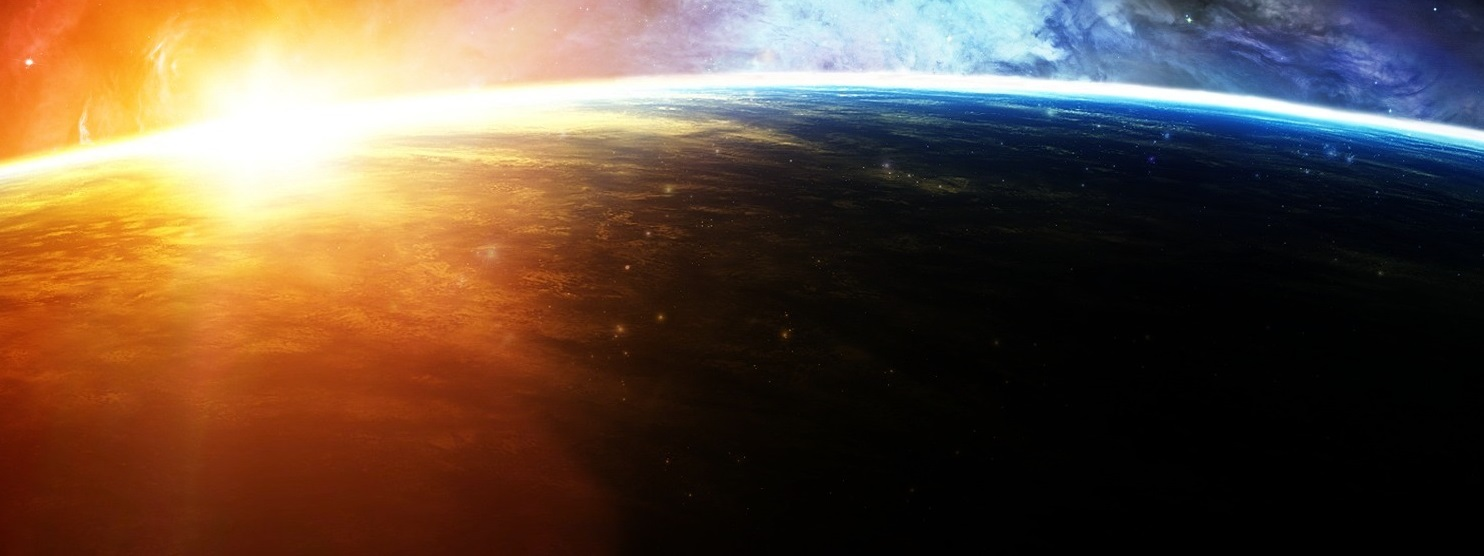
**Data Source**:Kaggle


**ABOUT THE DATASET**

The dataset consists of meteorological data from the HI SEAS weather station during 4 months.As the world increasingly shifts towards renewable energy sources, accurate solar radiation prediction becomes crucial for optimizing solar power generation, improving energy storage systems, and enhancing grid stability.

**FEATURES**

**UNIXTime**

Date and time representation widely used in computing

**Data**

Date during the data collection

**Time**

time during radiation in 24hr format

**Radiation**

Solar radiation in w/m^2

**Temperature**

atmospheric temperature in farenheit

**Pressure**

atmospheric pressure in Hg

**Humidity**

atmospheric humidity in %

**WindDirection**

winddirection in degrees

**speed**

wind speed in miles per hour

**TimeSunRise**

sunrise time in hh:mm:ss

**TimeSunSet**

sunset time in hh:mm:ss





**Importing Libraries and Data Loading**

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/SolarPrediction.csv')
df

UNIXTime                   Data      Time  Radiation  Temperature  \
0      1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1      1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2      1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3      1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4      1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   
...           ...                    ...       ...        ...          ...   
32681  1480587604  12/1/2016 12:00:00 AM  00:20:04       1.22           44   
32682  1480587301  12/1/2016 12:00:00 AM  00:15:01       1.17           44   
32683  1480587001  12/1/2016 12:00:00 AM  00:10:01       1.20           44   
32684  1480586702  12/1/2016 12:00:00 AM  00:05:02       1.23           44   
32685  1480586402  12/1/2016 12:00:00 AM  00:00:02       1.20           44   

       Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise  \
0         30.46        59                  177.39   5.62    06:13:00   
1         30.46        58                  176.78   3.37    06:13:00   
2         30.46        57                  158.75   3.37    06:13:00   
3         30.46        60                  137.71   3.37    06:13:00   
4         30.46        62                  104.95   5.62    06:13:00   
...         ...       ...                     ...    ...         ...   
32681     30.43       102                  145.42   6.75    06:41:00   
32682     30.42       102                  117.78   6.75    06:41:00   
32683     30.42       102                  145.19   9.00    06:41:00   
32684     30.42       101                  164.19   7.87    06:41:00   
32685     30.43       101                   83.59   3.37    06:41:00   

      TimeSunSet  
0       18:13:00  
1       18:13:00  
2       18:13:00  
3       18:13:00  
4       18:13:00  
...          ...  
32681   17:42:00  
32682   17:42:00  
32683   17:42:00  
32684   17:42:00  
32685   17:42:00  

[32686 rows x 11 columns]

**Overview of the Dataset**




In [ ]:
df.head()

UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
4     30.46        62                  104.95   5.62    06:13:00   18:13:00

In [ ]:
df.tail()

UNIXTime                   Data      Time  Radiation  Temperature  \
32681  1480587604  12/1/2016 12:00:00 AM  00:20:04       1.22           44   
32682  1480587301  12/1/2016 12:00:00 AM  00:15:01       1.17           44   
32683  1480587001  12/1/2016 12:00:00 AM  00:10:01       1.20           44   
32684  1480586702  12/1/2016 12:00:00 AM  00:05:02       1.23           44   
32685  1480586402  12/1/2016 12:00:00 AM  00:00:02       1.20           44   

       Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise  \
32681     30.43       102                  145.42   6.75    06:41:00   
32682     30.42       102                  117.78   6.75    06:41:00   
32683     30.42       102                  145.19   9.00    06:41:00   
32684     30.42       101                  164.19   7.87    06:41:00   
32685     30.43       101                   83.59   3.37    06:41:00   

      TimeSunSet  
32681   17:42:00  
32682   17:42:00  
32683   17:42:00  
32684   17:42:00  
32685   17:42:00

**Number of rows and columns in the dataset**

In [ ]:
df.shape

(32686, 11)

Dataset contains 32686 rows and 11 columns respectively.

**Header Details**

In [ ]:
df.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

**Dataset Information**







In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


**To check missing values**

In [ ]:
df.isna().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

**To check Datatypes**

In [ ]:
df.dtypes

UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

**EXPLORATORY DATA ANALYSIS**

Text(0.5, 1.0, 'Distribution of Temperature')

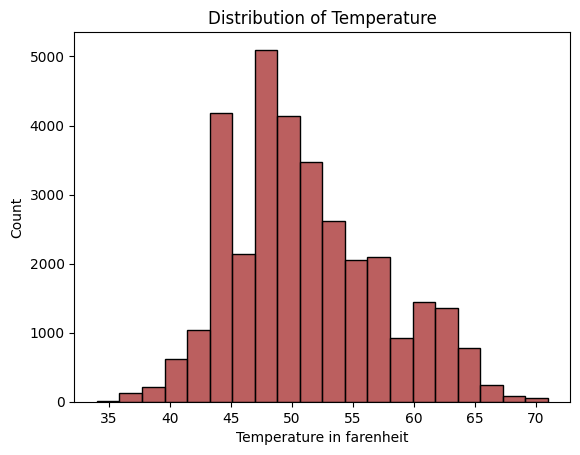

In [ ]:
sns.histplot(x=df['Temperature'],bins=20,color='brown')
plt.xlabel('Temperature in farenheit')
plt.ylabel('Count')
plt.title('Distribution of Temperature')

Text(0.5, 1.0, 'Distribution of Pressure')

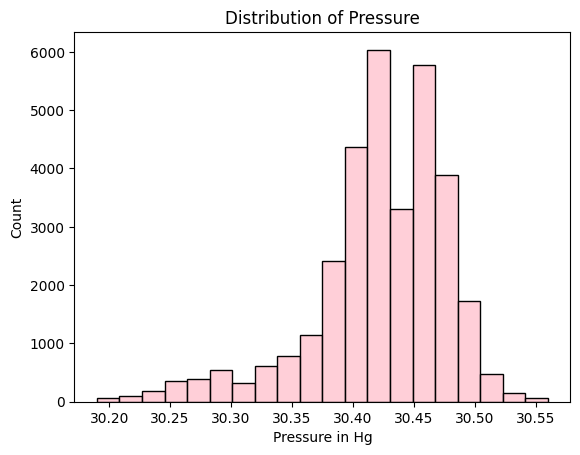

In [ ]:
sns.histplot(x=df['Pressure'],bins=20,color='pink')
plt.xlabel('Pressure in Hg')
plt.ylabel('Count')
plt.title('Distribution of Pressure')

Text(0.5, 1.0, 'Distribution of Humidity')

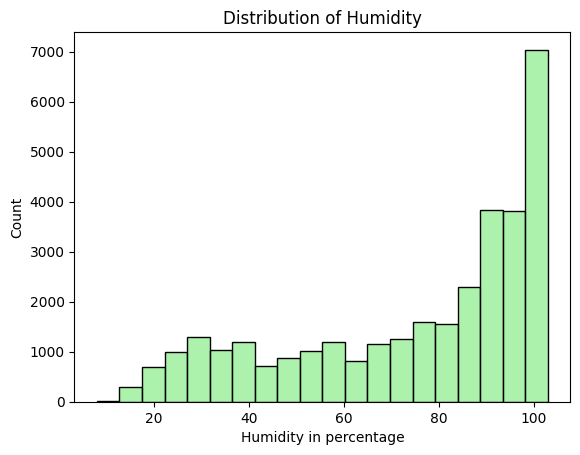

In [ ]:
sns.histplot(x=df['Humidity'],bins=20,color='lightgreen')
plt.xlabel('Humidity in percentage')
plt.ylabel('Count')
plt.title('Distribution of Humidity')

Text(0.5, 1.0, 'Distribution of WindDirection(Degrees)')

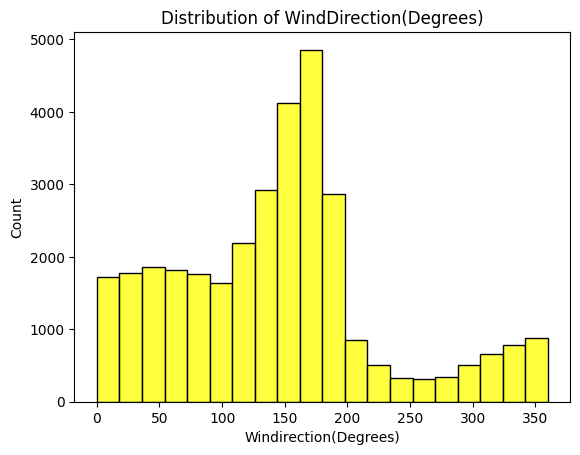

In [ ]:
sns.histplot(x=df['WindDirection(Degrees)'],bins=20,color='yellow')
plt.xlabel('Windirection(Degrees)')
plt.ylabel('Count')
plt.title('Distribution of WindDirection(Degrees)')

Text(0.5, 1.0, 'Distribution of Speed')

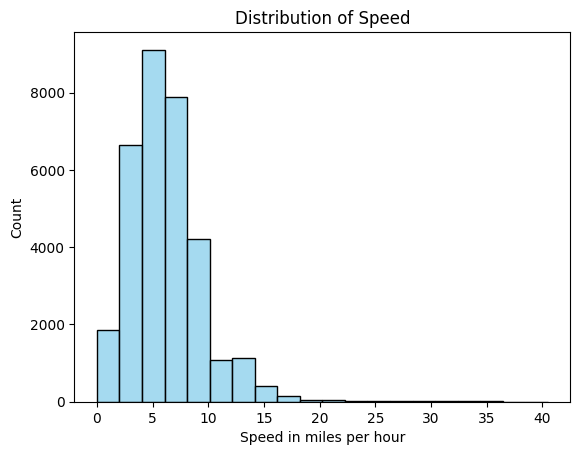

In [ ]:
sns.histplot(x=df['Speed'],bins=20,color='skyblue')
plt.xlabel('Speed in miles per hour')
plt.ylabel('Count')
plt.title('Distribution of Speed')

Text(0.5, 1.0, 'Distribution of Sunrise Time')

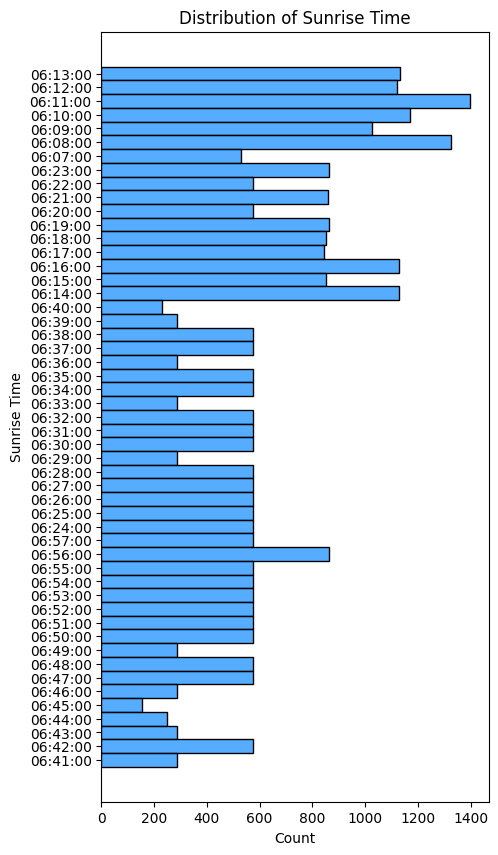

In [ ]:
plt.figure(figsize=(5, 10))
sns.histplot(y=df['TimeSunRise'],bins=70,color='dodgerblue')
plt.xlabel('Count')
plt.ylabel('Sunrise Time')
plt.title('Distribution of Sunrise Time')


Text(0.5, 1.0, 'Distribution of Sunset Time')

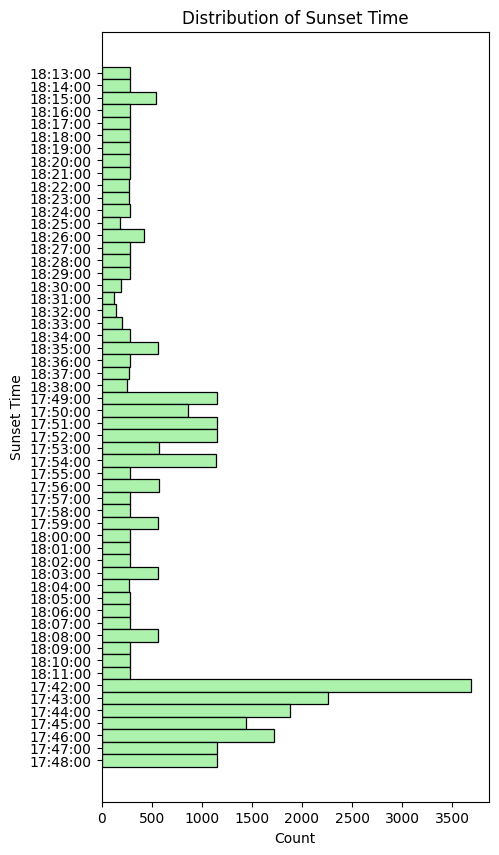

In [ ]:
plt.figure(figsize=(5, 10))
sns.histplot(y=df['TimeSunSet'],bins=20,color='lightgreen')
plt.xlabel('Count')
plt.ylabel('Sunset Time')
plt.title('Distribution of Sunset Time')

**Pairplot to visualize relationships between variables**

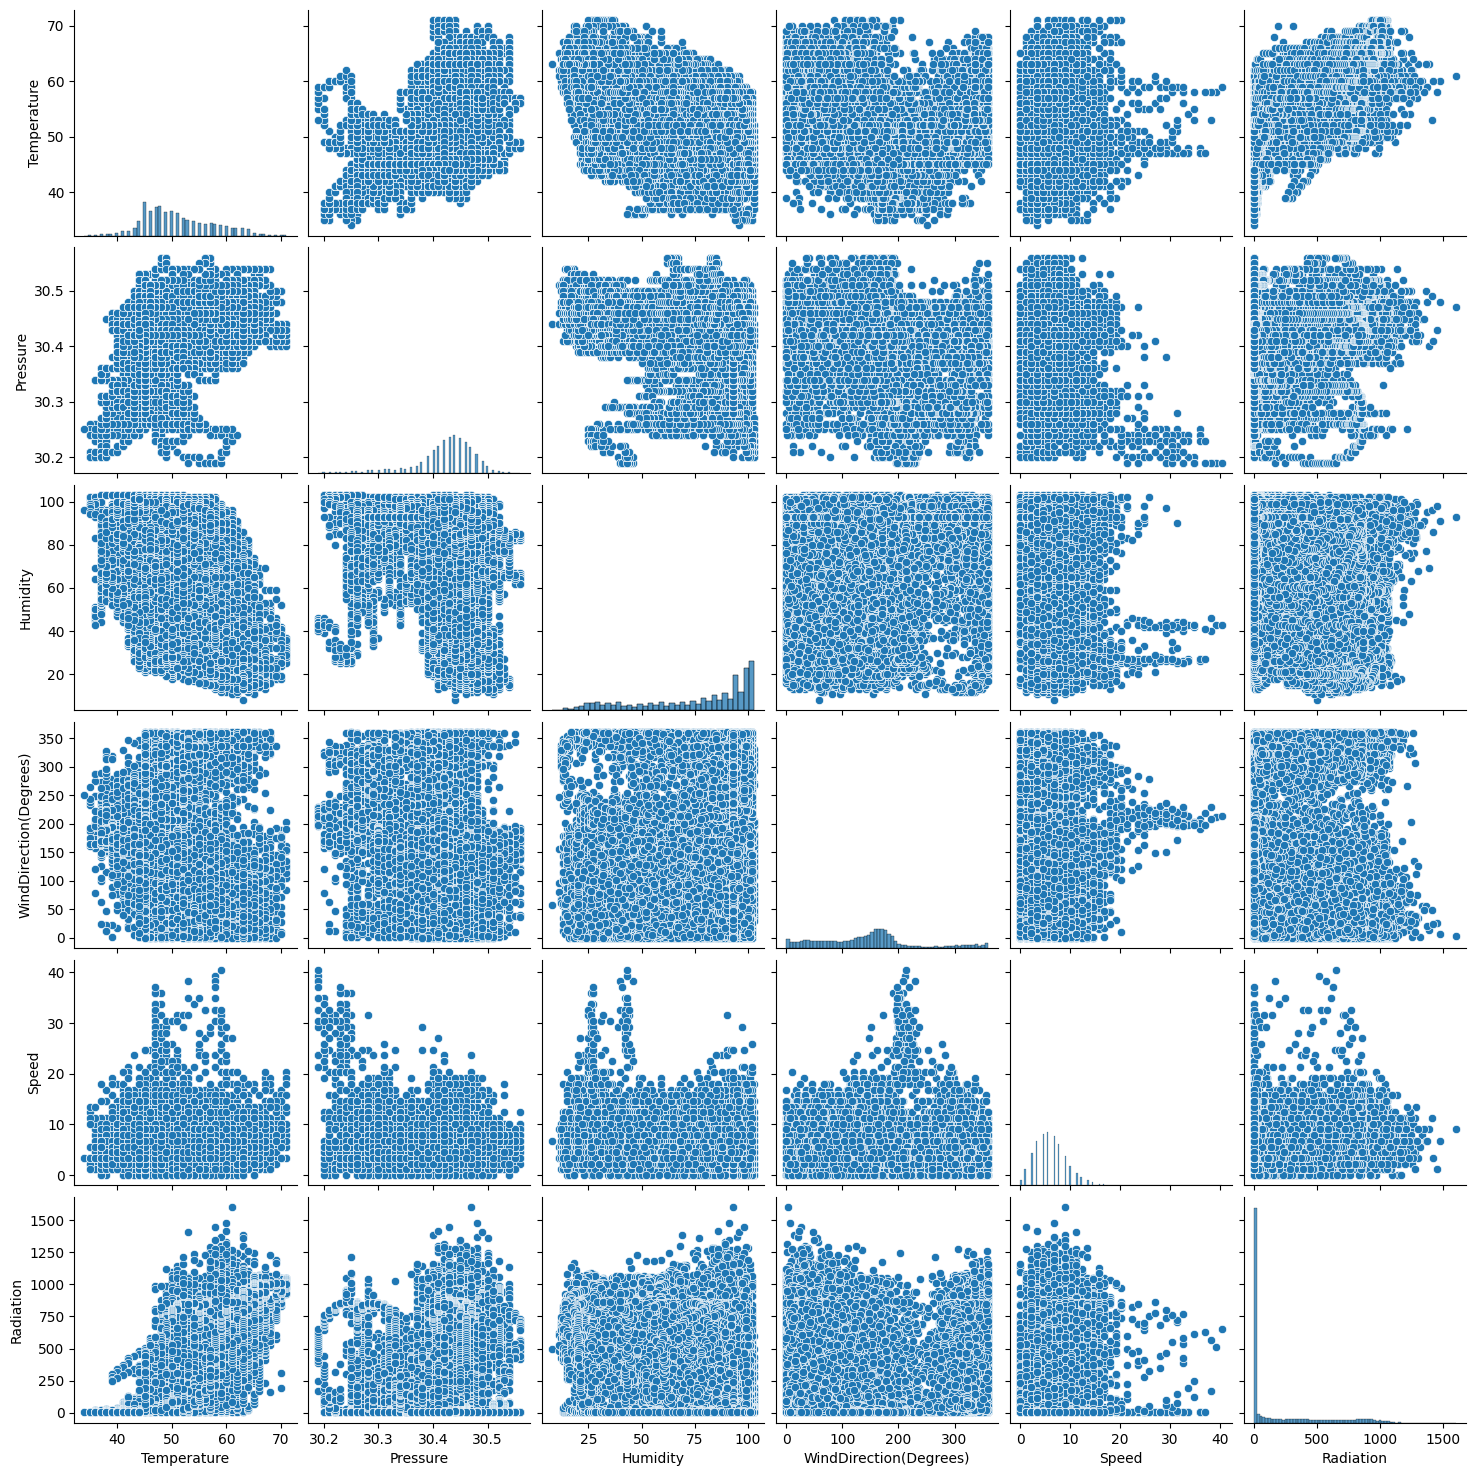

In [ ]:
sns.pairplot(df[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'Radiation']])
plt.show()

**Bar plots**

Text(0.5, 1.0, 'Mean Radiation by Temperature')

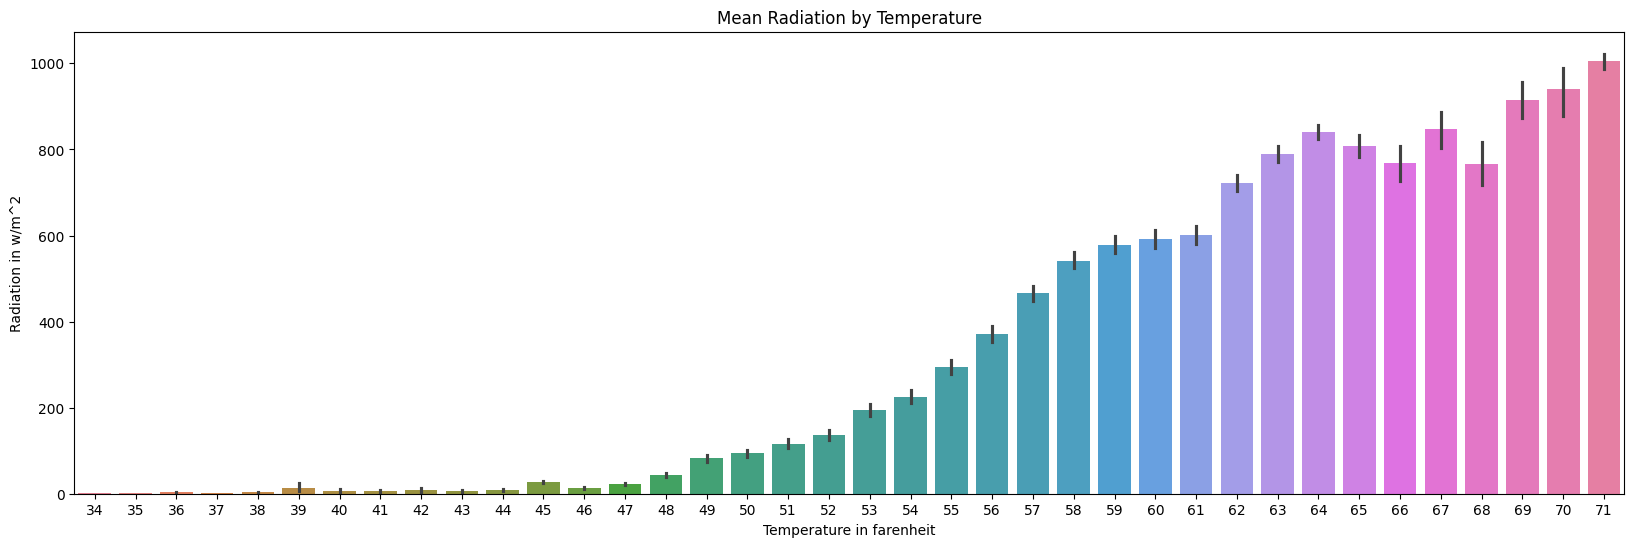

In [ ]:
fig= plt.figure(figsize=(20, 6))
sns.barplot(x="Temperature", y='Radiation', data=df,palette='husl')
plt.xlabel('Temperature in farenheit')
plt.ylabel('Radiation in w/m^2')
plt.title('Mean Radiation by Temperature')


Text(0.5, 1.0, 'Mean Radiation by Pressure')

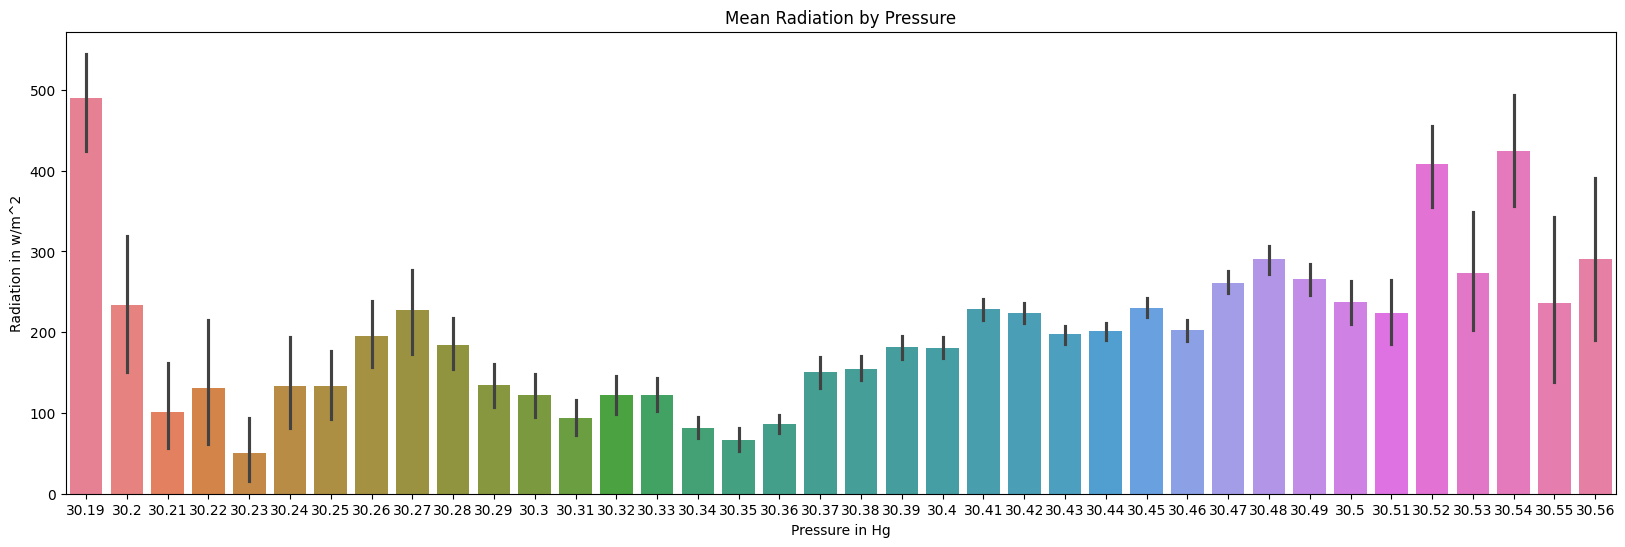

In [ ]:
fig= plt.figure(figsize=(20, 6))
sns.barplot(x="Pressure", y='Radiation', data=df,palette='husl')
plt.xlabel('Pressure in Hg')
plt.ylabel('Radiation in w/m^2')
plt.title('Mean Radiation by Pressure')

Text(0.5, 1.0, 'Mean radiation by humidity')

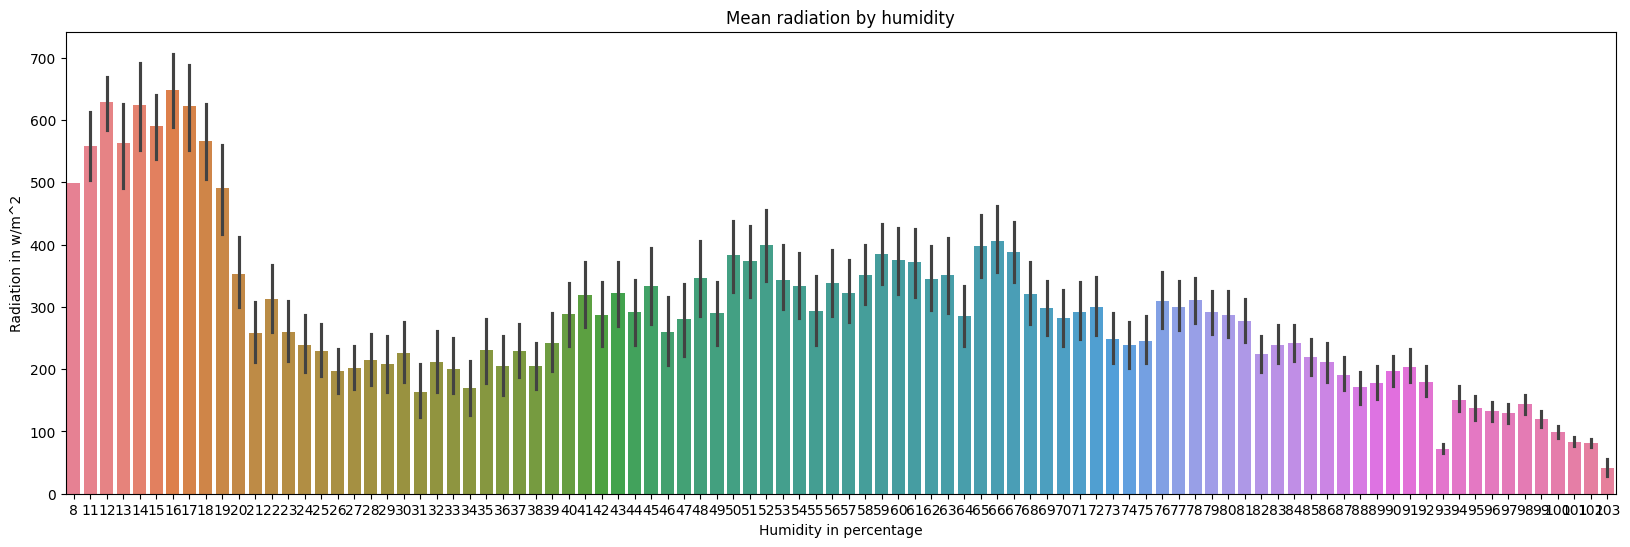

In [ ]:
fig= plt.figure(figsize=(20, 6))
sns.barplot(x="Humidity", y='Radiation', data=df,palette='husl')
plt.xlabel('Humidity in percentage')
plt.ylabel('Radiation in w/m^2')
plt.title('Mean radiation by humidity')

Text(0.5, 1.0, 'Mean radiation by Speed')

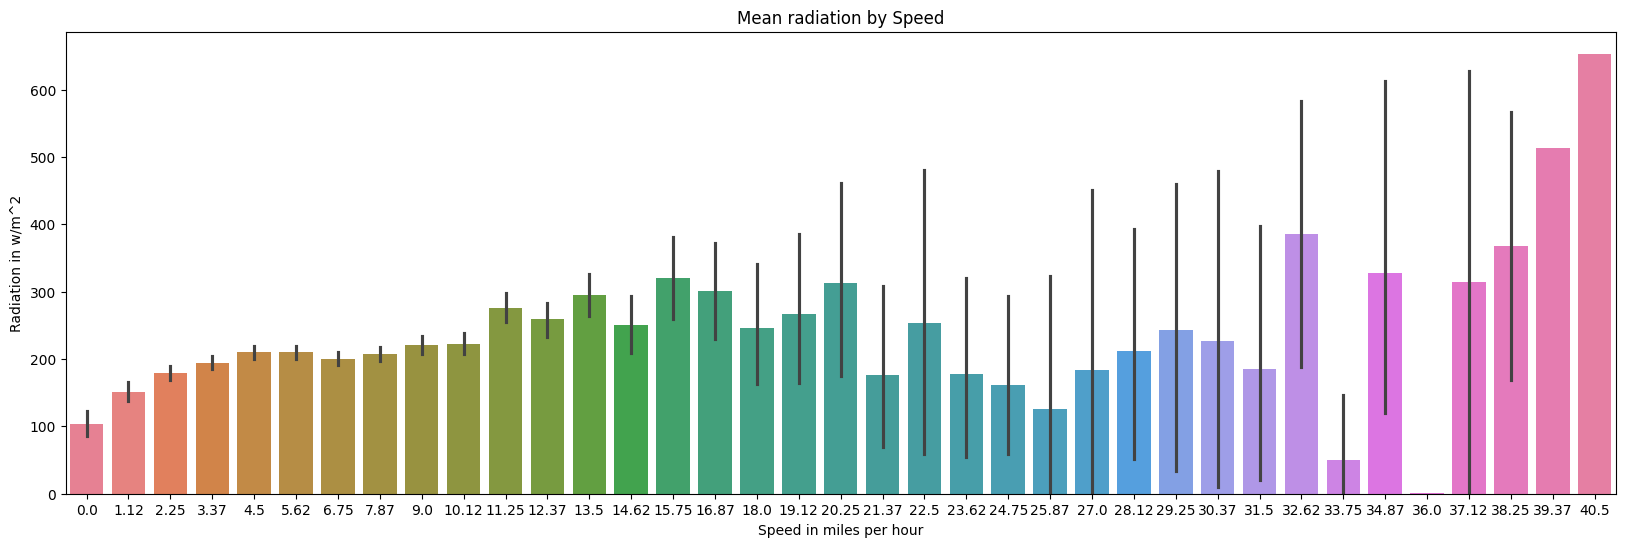

In [ ]:
fig= plt.figure(figsize=(20, 6))
sns.barplot(x="Speed", y='Radiation', data=df,palette='husl')
plt.xlabel('Speed in miles per hour')
plt.ylabel('Radiation in w/m^2')
plt.title('Mean radiation by Speed')

Text(0.5, 1.0, 'Mean radiation by TimeSunRise')

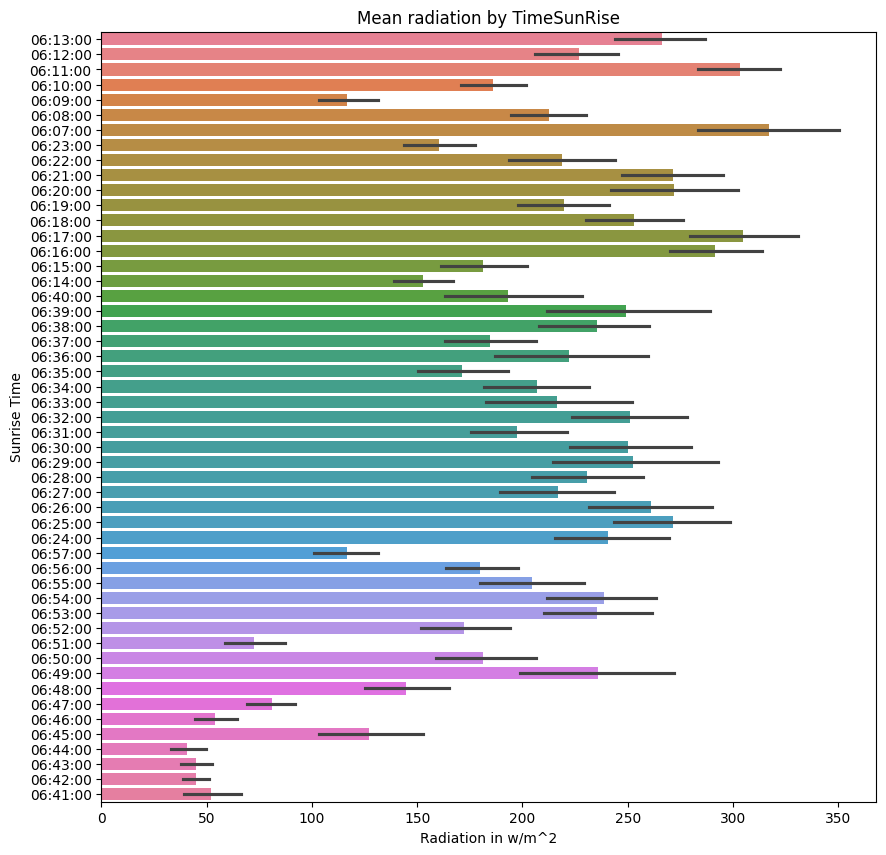

In [ ]:
fig= plt.figure(figsize=(10, 10))
sns.barplot(y="TimeSunRise", x='Radiation', data=df,palette='husl')
plt.xlabel('Radiation in w/m^2')
plt.ylabel('Sunrise Time')
plt.title('Mean radiation by TimeSunRise')

Text(0.5, 1.0, 'Mean radiation by TimeSunSet')

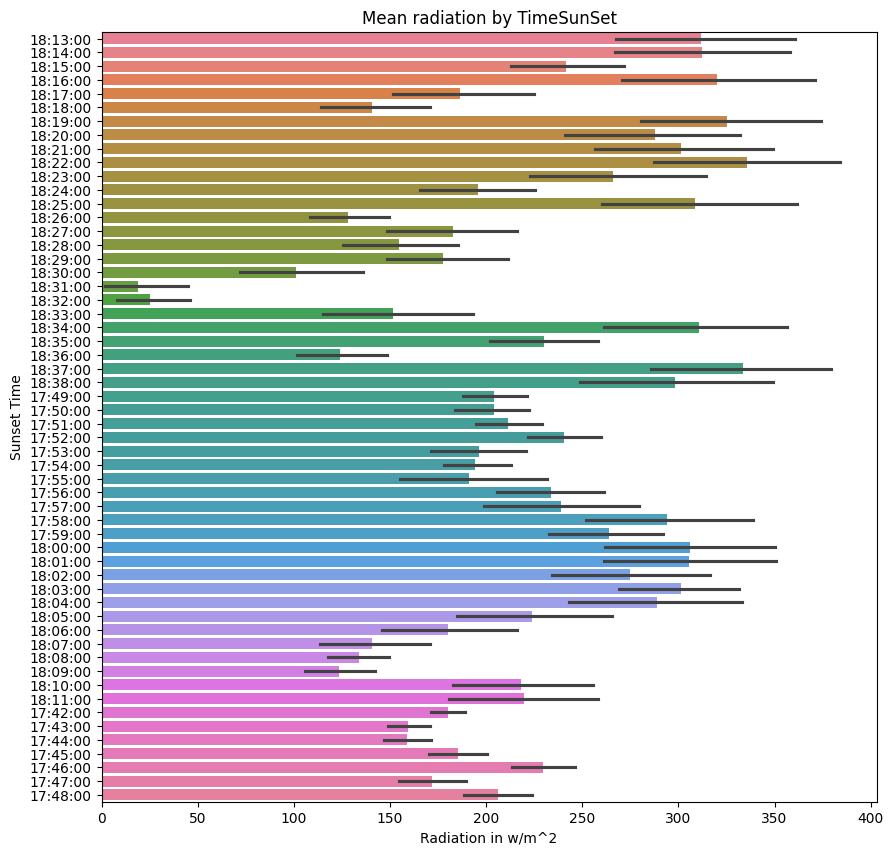

In [ ]:
fig= plt.figure(figsize=(10,10))
sns.barplot(y="TimeSunSet", x='Radiation', data=df,palette='husl')
plt.xlabel('Radiation in w/m^2')
plt.ylabel('Sunset Time')
plt.title('Mean radiation by TimeSunSet')

**Scatter plots**

Text(0.5, 1.0, 'Temperature vs Pressure with Radiation Hue')

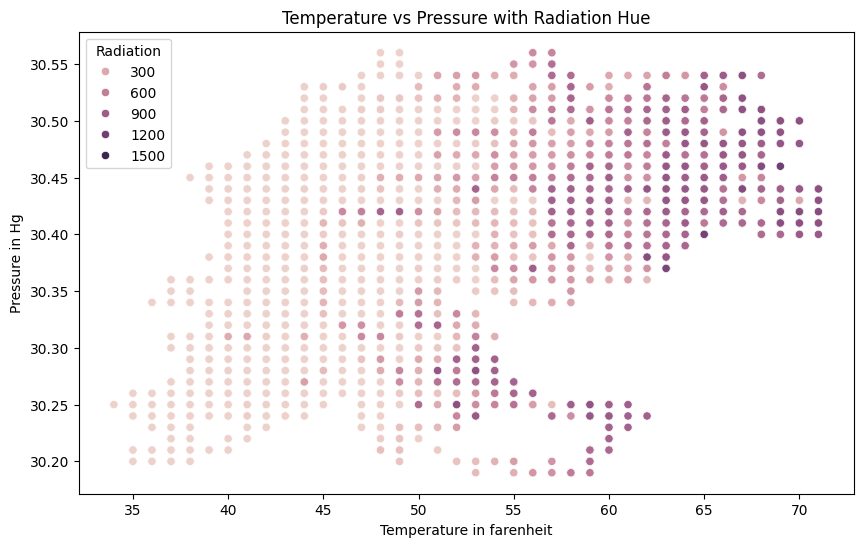

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
sns.scatterplot(x=df['Temperature'],y=df['Pressure'],hue=df['Radiation'])
plt.xlabel('Temperature in farenheit')
plt.ylabel('Pressure in Hg')
plt.title('Temperature vs Pressure with Radiation Hue')

Text(0.5, 1.0, 'Speed vs Windirection(degrees) with Radiation Hue')

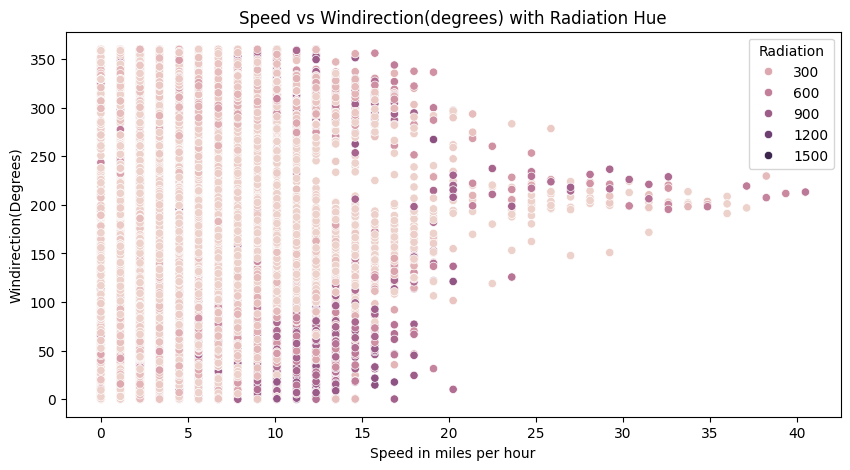

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(y=df['WindDirection(Degrees)'],x=df['Speed'],hue=df['Radiation'])
plt.xlabel('Speed in miles per hour')
plt.ylabel('Windirection(Degrees)')
plt.title('Speed vs Windirection(degrees) with Radiation Hue')

Text(0.5, 1.0, 'Speed vs Humidity with Radiation Hue')

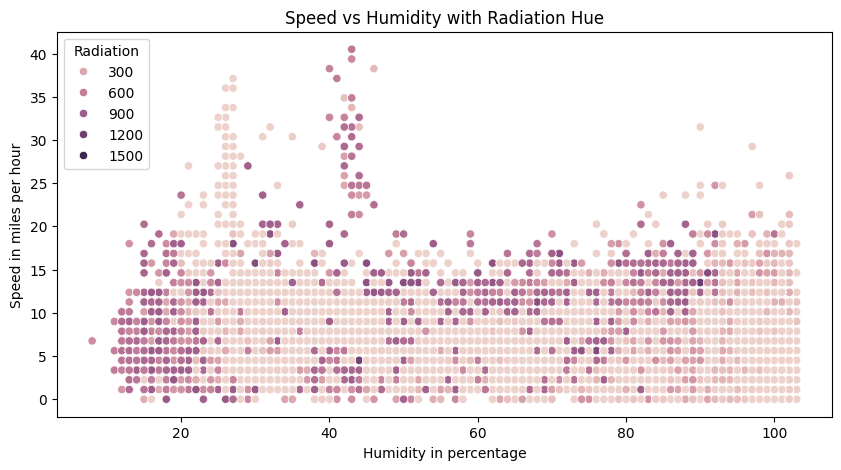

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(y=df['Speed'],x=df['Humidity'],hue=df['Radiation'])
plt.xlabel('Humidity in percentage')
plt.ylabel('Speed in miles per hour')
plt.title('Speed vs Humidity with Radiation Hue')

**Data Encoding**

In [ ]:
# extract the date from the date_time format of the 'Data' parameter
df['Data'] = df['Data'].apply(lambda x: x.split()[0])
df

UNIXTime       Data      Time  Radiation  Temperature  Pressure  \
0      1475229326  9/29/2016  23:55:26       1.21           48     30.46   
1      1475229023  9/29/2016  23:50:23       1.21           48     30.46   
2      1475228726  9/29/2016  23:45:26       1.23           48     30.46   
3      1475228421  9/29/2016  23:40:21       1.21           48     30.46   
4      1475228124  9/29/2016  23:35:24       1.17           48     30.46   
...           ...        ...       ...        ...          ...       ...   
32681  1480587604  12/1/2016  00:20:04       1.22           44     30.43   
32682  1480587301  12/1/2016  00:15:01       1.17           44     30.42   
32683  1480587001  12/1/2016  00:10:01       1.20           44     30.42   
32684  1480586702  12/1/2016  00:05:02       1.23           44     30.42   
32685  1480586402  12/1/2016  00:00:02       1.20           44     30.43   

       Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0            59                  177.39   5.62    06:13:00   18:13:00  
1            58                  176.78   3.37    06:13:00   18:13:00  
2            57                  158.75   3.37    06:13:00   18:13:00  
3            60                  137.71   3.37    06:13:00   18:13:00  
4            62                  104.95   5.62    06:13:00   18:13:00  
...         ...                     ...    ...         ...        ...  
32681       102                  145.42   6.75    06:41:00   17:42:00  
32682       102                  117.78   6.75    06:41:00   17:42:00  
32683       102                  145.19   9.00    06:41:00   17:42:00  
32684       101                  164.19   7.87    06:41:00   17:42:00  
32685       101                   83.59   3.37    06:41:00   17:42:00  

[32686 rows x 11 columns]

In [ ]:
# extract the date time features from the given parameter using date time function
df["Month"]    = pd.to_datetime(df['Data']).dt.month
df['Day']      = pd.to_datetime(df['Data']).dt.day
df['Hour']     = pd.to_datetime(df['Time']).dt.hour
df['Minute']   = pd.to_datetime(df['Time']).dt.minute
df['Second']   = pd.to_datetime(df['Time']).dt.second
df


UNIXTime       Data      Time  Radiation  Temperature  Pressure  \
0      1475229326  9/29/2016  23:55:26       1.21           48     30.46   
1      1475229023  9/29/2016  23:50:23       1.21           48     30.46   
2      1475228726  9/29/2016  23:45:26       1.23           48     30.46   
3      1475228421  9/29/2016  23:40:21       1.21           48     30.46   
4      1475228124  9/29/2016  23:35:24       1.17           48     30.46   
...           ...        ...       ...        ...          ...       ...   
32681  1480587604  12/1/2016  00:20:04       1.22           44     30.43   
32682  1480587301  12/1/2016  00:15:01       1.17           44     30.42   
32683  1480587001  12/1/2016  00:10:01       1.20           44     30.42   
32684  1480586702  12/1/2016  00:05:02       1.23           44     30.42   
32685  1480586402  12/1/2016  00:00:02       1.20           44     30.43   

       Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  Month  \
0            59                  177.39   5.62    06:13:00   18:13:00      9   
1            58                  176.78   3.37    06:13:00   18:13:00      9   
2            57                  158.75   3.37    06:13:00   18:13:00      9   
3            60                  137.71   3.37    06:13:00   18:13:00      9   
4            62                  104.95   5.62    06:13:00   18:13:00      9   
...         ...                     ...    ...         ...        ...    ...   
32681       102                  145.42   6.75    06:41:00   17:42:00     12   
32682       102                  117.78   6.75    06:41:00   17:42:00     12   
32683       102                  145.19   9.00    06:41:00   17:42:00     12   
32684       101                  164.19   7.87    06:41:00   17:42:00     12   
32685       101                   83.59   3.37    06:41:00   17:42:00     12   

       Day  Hour  Minute  Second  
0       29    23      55      26  
1       29    23      50      23  
2       29    23      45      26  
3       29    23      40      21  
4       29    23      35      24  
...    ...   ...     ...     ...  
32681    1     0      20       4  
32682    1     0      15       1  
32683    1     0      10       1  
32684    1     0       5       2  
32685    1     0       0       2  

[32686 rows x 16 columns]

In [ ]:
# extract the sunrise and sunset information using regular expression
df['riseHour']   = df['TimeSunRise'].apply(lambda x:re.search(r'^\d+', x).group(0))
df['riseMinute'] = df['TimeSunRise'].apply(lambda x:re.search(r'(?<=\:)\d+(?=\:)', x).group(0))
df['setHour']   = df['TimeSunSet'].apply(lambda x:re.search(r'^\d+', x).group(0))
df['setMinute'] = df['TimeSunSet'].apply(lambda x:re.search(r'(?<=\:)\d+(?=\:)', x).group(0))
df

UNIXTime       Data      Time  Radiation  Temperature  Pressure  \
0      1475229326  9/29/2016  23:55:26       1.21           48     30.46   
1      1475229023  9/29/2016  23:50:23       1.21           48     30.46   
2      1475228726  9/29/2016  23:45:26       1.23           48     30.46   
3      1475228421  9/29/2016  23:40:21       1.21           48     30.46   
4      1475228124  9/29/2016  23:35:24       1.17           48     30.46   
...           ...        ...       ...        ...          ...       ...   
32681  1480587604  12/1/2016  00:20:04       1.22           44     30.43   
32682  1480587301  12/1/2016  00:15:01       1.17           44     30.42   
32683  1480587001  12/1/2016  00:10:01       1.20           44     30.42   
32684  1480586702  12/1/2016  00:05:02       1.23           44     30.42   
32685  1480586402  12/1/2016  00:00:02       1.20           44     30.43   

       Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  Month  \
0            59                  177.39   5.62    06:13:00   18:13:00      9   
1            58                  176.78   3.37    06:13:00   18:13:00      9   
2            57                  158.75   3.37    06:13:00   18:13:00      9   
3            60                  137.71   3.37    06:13:00   18:13:00      9   
4            62                  104.95   5.62    06:13:00   18:13:00      9   
...         ...                     ...    ...         ...        ...    ...   
32681       102                  145.42   6.75    06:41:00   17:42:00     12   
32682       102                  117.78   6.75    06:41:00   17:42:00     12   
32683       102                  145.19   9.00    06:41:00   17:42:00     12   
32684       101                  164.19   7.87    06:41:00   17:42:00     12   
32685       101                   83.59   3.37    06:41:00   17:42:00     12   

       Day  Hour  Minute  Second riseHour riseMinute setHour setMinute  
0       29    23      55      26       06         13      18        13  
1       29    23      50      23       06         13      18        13  
2       29    23      45      26       06         13      18        13  
3       29    23      40      21       06         13      18        13  
4       29    23      35      24       06         13      18        13  
...    ...   ...     ...     ...      ...        ...     ...       ...  
32681    1     0      20       4       06         41      17        42  
32682    1     0      15       1       06         41      17        42  
32683    1     0      10       1       06         41      17        42  
32684    1     0       5       2       06         41      17        42  
32685    1     0       0       2       06         41      17        42  

[32686 rows x 20 columns]

In [ ]:
df.dtypes

UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
Month                       int32
Day                         int32
Hour                        int32
Minute                      int32
Second                      int32
riseHour                   object
riseMinute                 object
setHour                    object
setMinute                  object
dtype: object

In [ ]:
#datatype conversion
df['riseHour'] =df['riseHour'].astype(int)
df['riseMinute'] =df['riseMinute'].astype(int)
df['setHour'] =df['setHour'].astype(int)
df['setMinute'] =df['setMinute'].astype(int)


In [ ]:
# drop the parameters that are not required after extracting the relevant information
df.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'],axis=1,inplace=True)
df

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  \
0           1.21           48     30.46        59                  177.39   
1           1.21           48     30.46        58                  176.78   
2           1.23           48     30.46        57                  158.75   
3           1.21           48     30.46        60                  137.71   
4           1.17           48     30.46        62                  104.95   
...          ...          ...       ...       ...                     ...   
32681       1.22           44     30.43       102                  145.42   
32682       1.17           44     30.42       102                  117.78   
32683       1.20           44     30.42       102                  145.19   
32684       1.23           44     30.42       101                  164.19   
32685       1.20           44     30.43       101                   83.59   

       Speed  Month  Day  Hour  Minute  Second  riseHour  riseMinute  setHour  \
0       5.62      9   29    23      55      26         6          13       18   
1       3.37      9   29    23      50      23         6          13       18   
2       3.37      9   29    23      45      26         6          13       18   
3       3.37      9   29    23      40      21         6          13       18   
4       5.62      9   29    23      35      24         6          13       18   
...      ...    ...  ...   ...     ...     ...       ...         ...      ...   
32681   6.75     12    1     0      20       4         6          41       17   
32682   6.75     12    1     0      15       1         6          41       17   
32683   9.00     12    1     0      10       1         6          41       17   
32684   7.87     12    1     0       5       2         6          41       17   
32685   3.37     12    1     0       0       2         6          41       17   

       setMinute  
0             13  
1             13  
2             13  
3             13  
4             13  
...          ...  
32681         42  
32682         42  
32683         42  
32684         42  
32685         42  

[32686 rows x 15 columns]

In [ ]:
df.dtypes

Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
Month                       int32
Day                         int32
Hour                        int32
Minute                      int32
Second                      int32
riseHour                    int64
riseMinute                  int64
setHour                     int64
setMinute                   int64
dtype: object

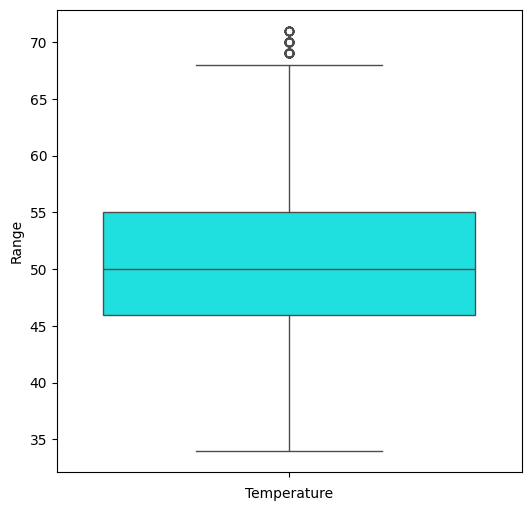

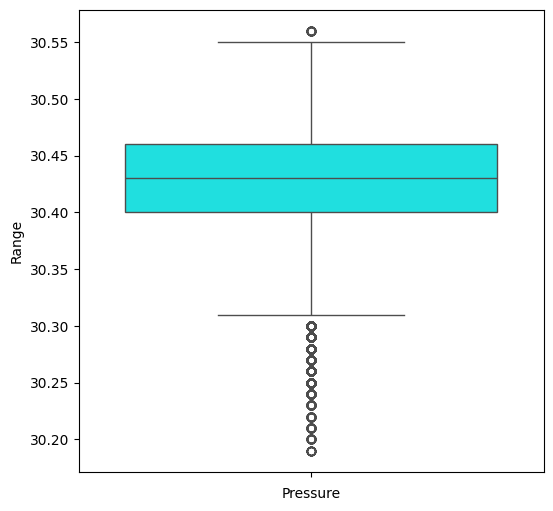

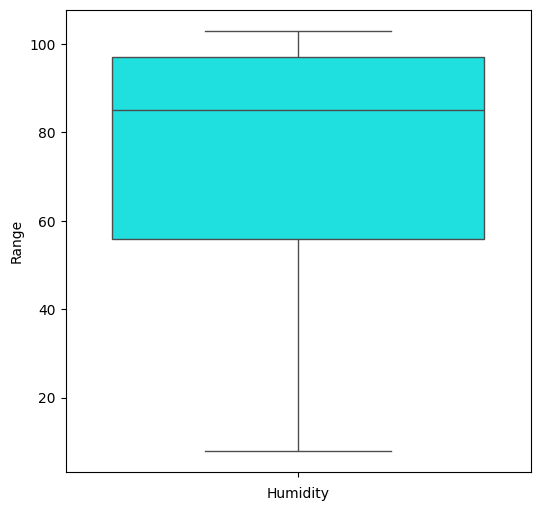

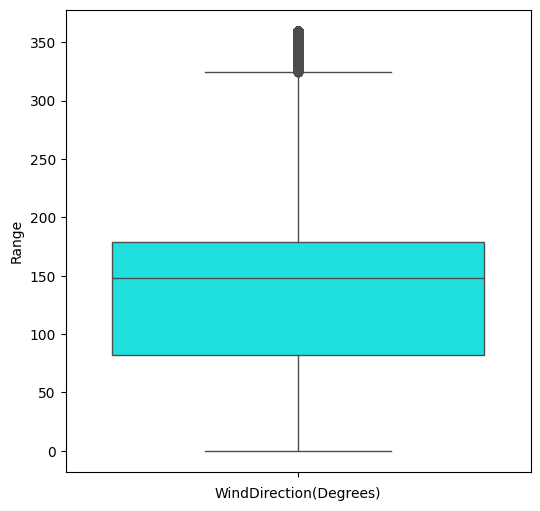

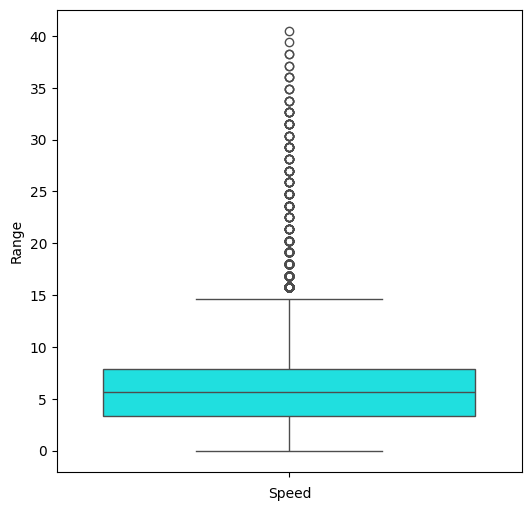

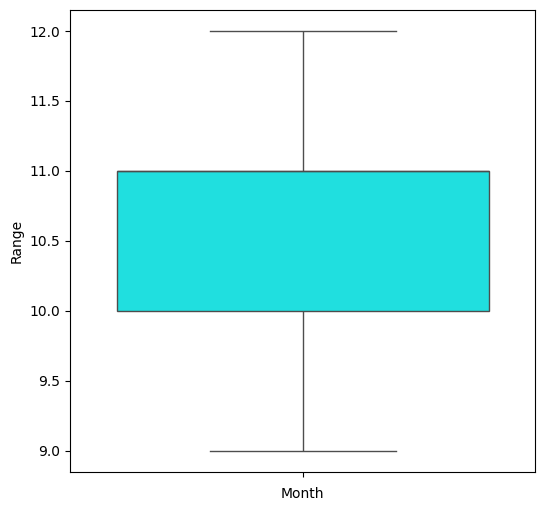

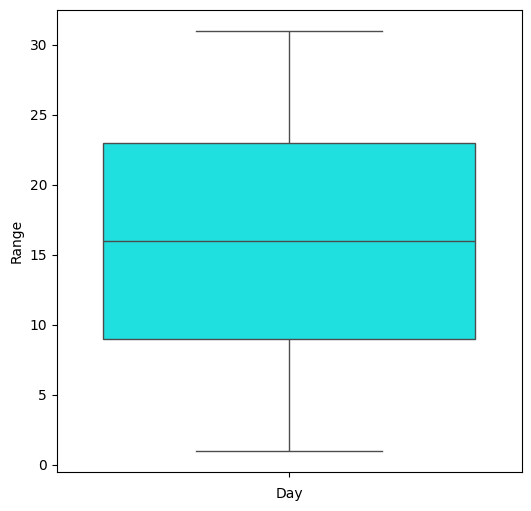

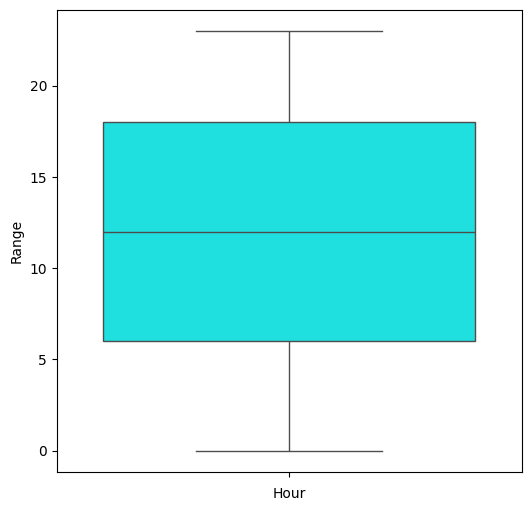

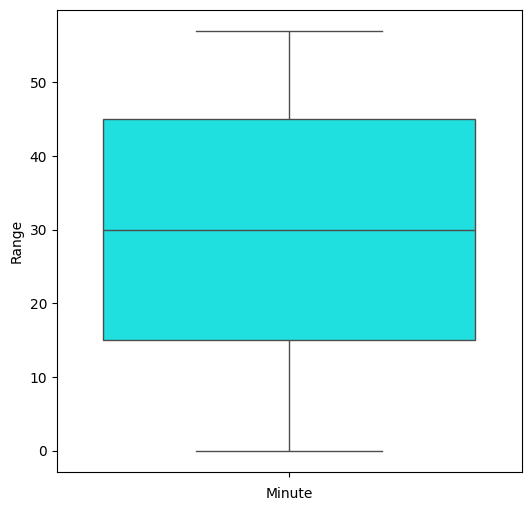

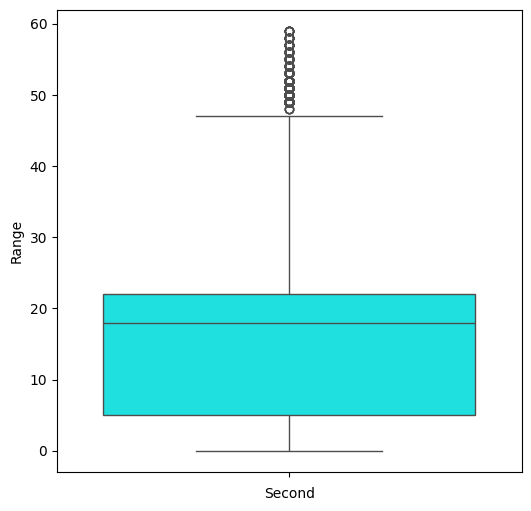

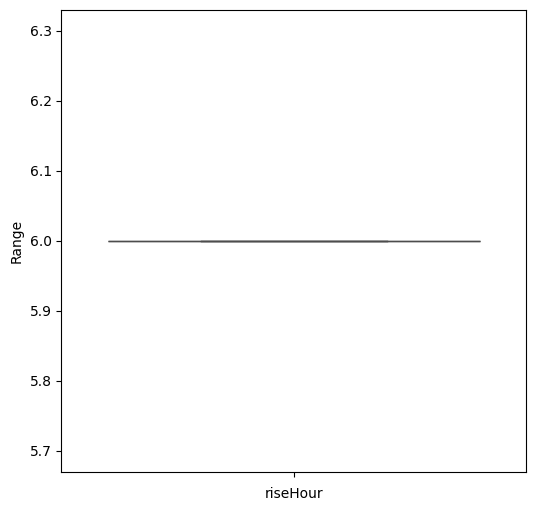

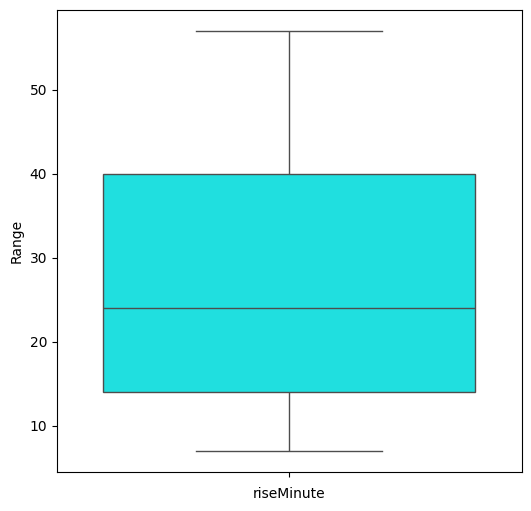

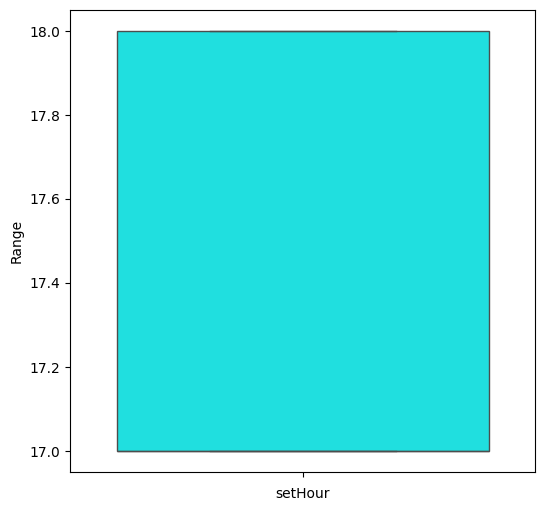

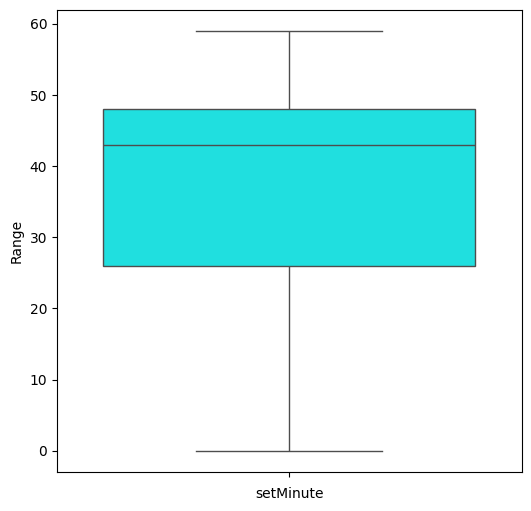

In [ ]:
#plotting boxplot for identifying outlier
lst=['Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed','Month','Day',
         'Hour','Minute','Second','riseHour','riseMinute','setHour','setMinute']
for i in lst:
  plt.figure(figsize=(6,6))
  sns.boxplot(df[i],color='cyan')
  plt.xlabel(i)
  plt.ylabel('Range')

In [ ]:
#Outlier removal using IQR
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
max_limit=q3+(1.5*IQR)
min_limit=q1-(1.5*IQR)

In [ ]:
df=pd.DataFrame(np.where(df>max_limit,max_limit,(np.where(df<min_limit,min_limit,df))),columns=df.columns)

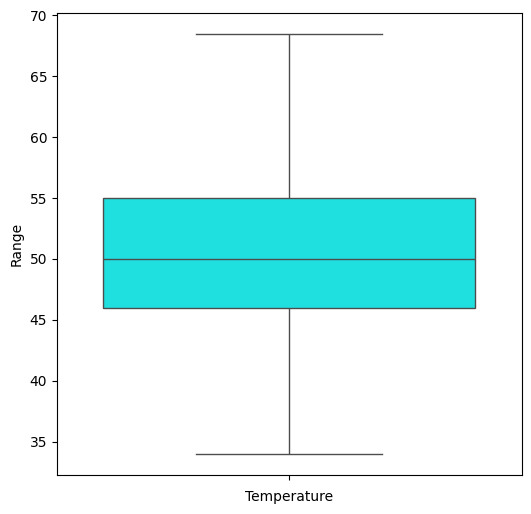

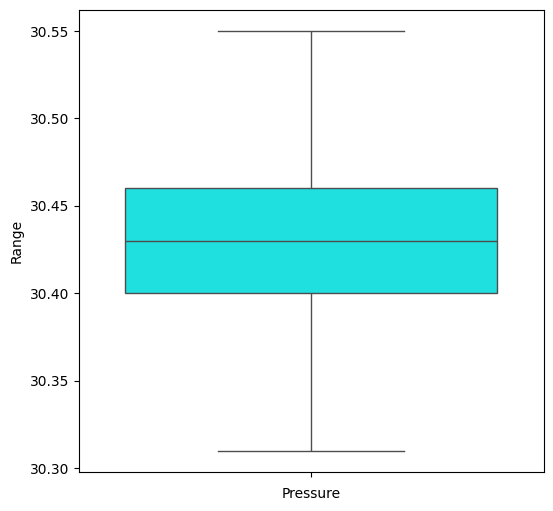

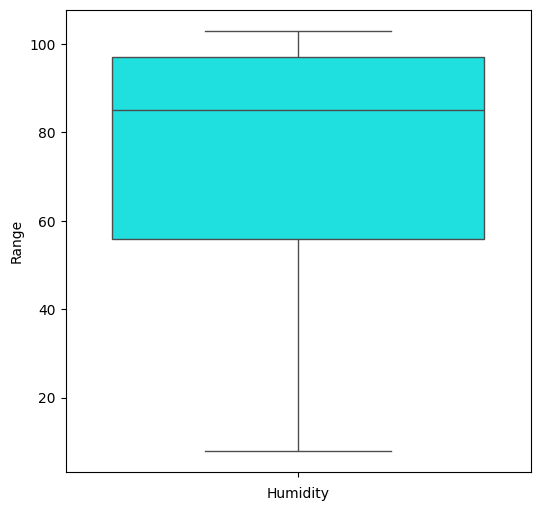

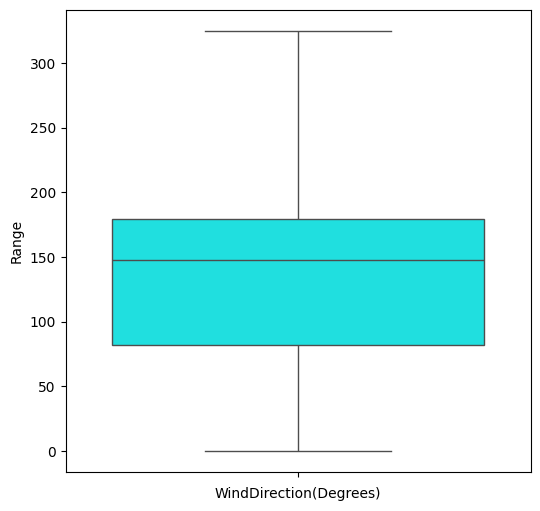

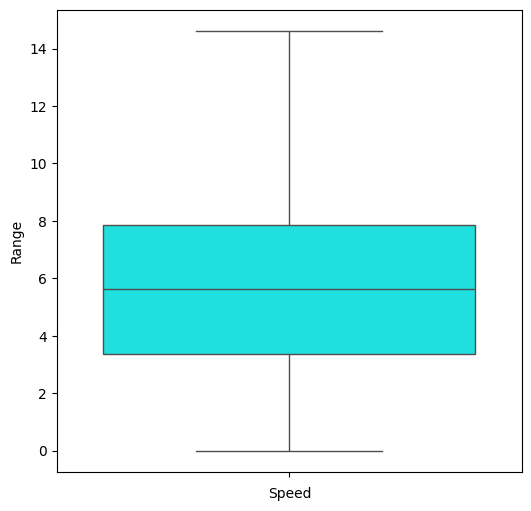

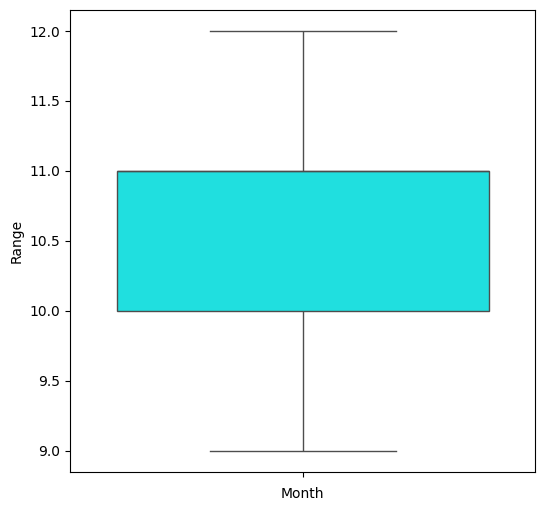

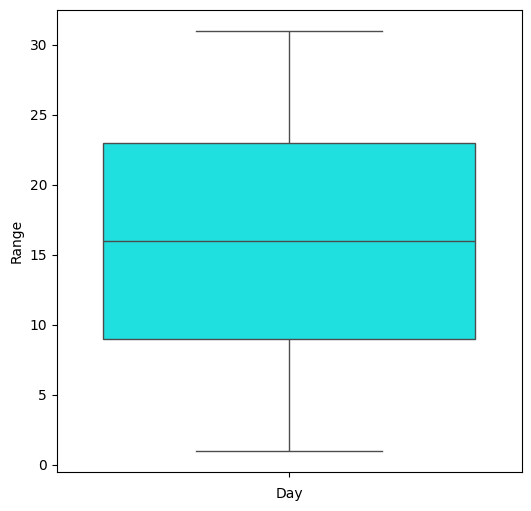

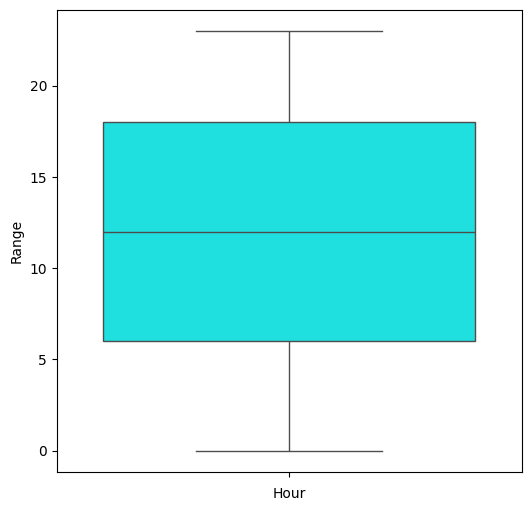

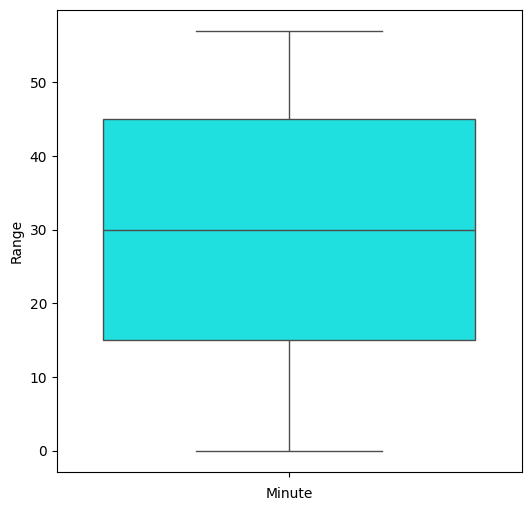

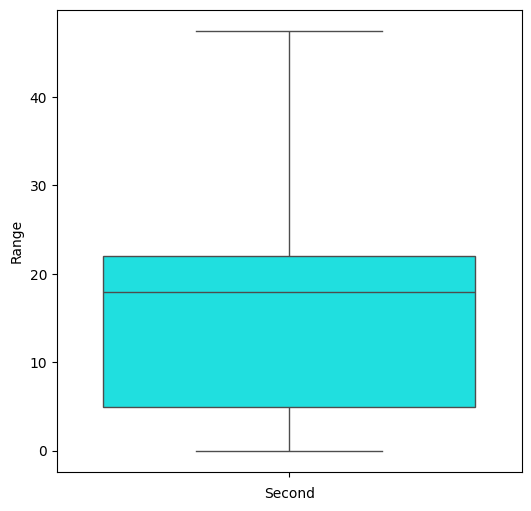

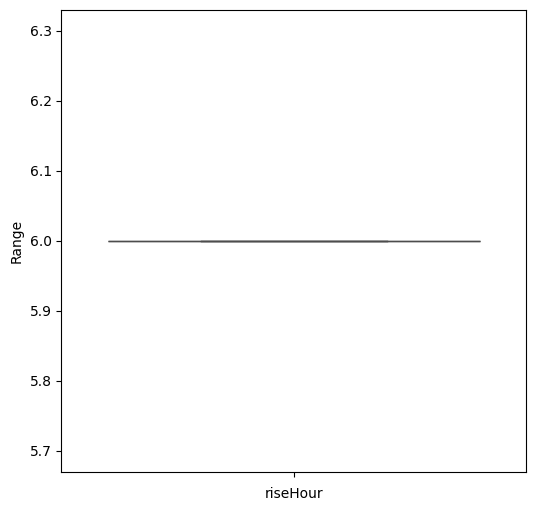

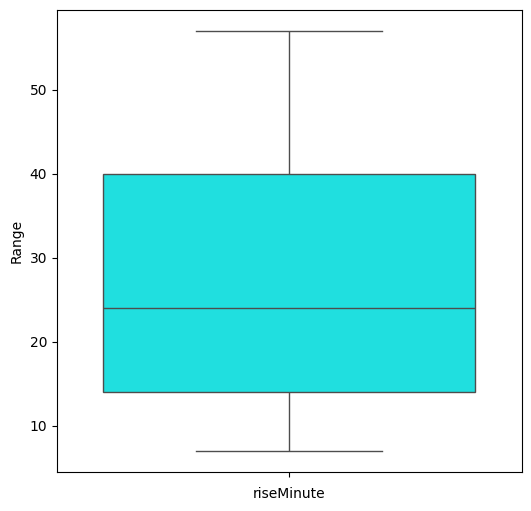

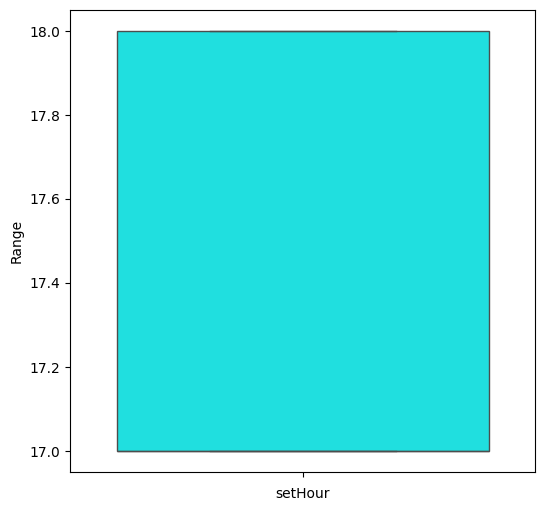

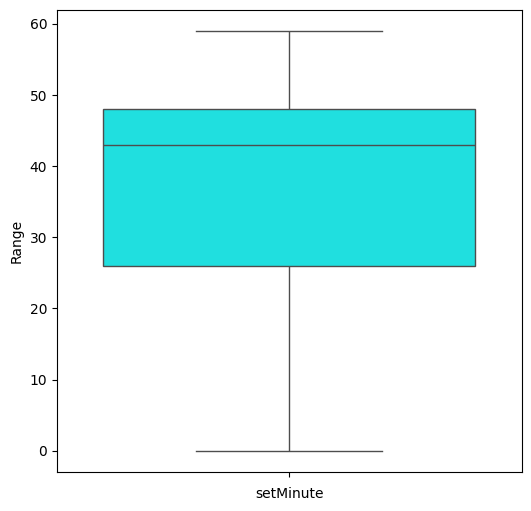

In [ ]:
#Boxplots after removing outliers
lst=['Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed','Month','Day',
         'Hour','Minute','Second','riseHour','riseMinute','setHour','setMinute']
for i in lst:
  plt.figure(figsize=(6,6))
  sns.boxplot(df[i],color='cyan')
  plt.xlabel(i)
  plt.ylabel('Range')

**Feature Selection using Correlation and Heatmap**

In [ ]:
# extract the correlation between the data features
corr_matrix = df.corr()
corr_matrix

Radiation  Temperature  Pressure  Humidity  \
Radiation                1.000000     0.738263  0.127136 -0.229469   
Temperature              0.738263     1.000000  0.314977 -0.284613   
Pressure                 0.127136     0.314977  1.000000 -0.250540   
Humidity                -0.229469    -0.284613 -0.250540  1.000000   
WindDirection(Degrees)  -0.249010    -0.278955 -0.221212 -0.001670   
Speed                    0.077397    -0.037583 -0.008457 -0.207280   
Month                   -0.084300    -0.354449 -0.325061 -0.068854   
Day                      0.043495    -0.124220 -0.024957  0.014637   
Hour                     0.004103     0.197740  0.098771  0.077899   
Minute                  -0.001058    -0.001922  0.001803  0.000499   
Second                  -0.030728    -0.033806 -0.047576 -0.025799   
riseHour                      NaN          NaN       NaN       NaN   
riseMinute              -0.082443    -0.381032 -0.363418 -0.023955   
setHour                  0.036580     0.300844  0.138642  0.145143   
setMinute               -0.031136    -0.242880 -0.108588 -0.119526   

                        WindDirection(Degrees)     Speed     Month       Day  \
Radiation                            -0.249010  0.077397 -0.084300  0.043495   
Temperature                          -0.278955 -0.037583 -0.354449 -0.124220   
Pressure                             -0.221212 -0.008457 -0.325061 -0.024957   
Humidity                             -0.001670 -0.207280 -0.068854  0.014637   
WindDirection(Degrees)                1.000000  0.070199  0.188066 -0.083226   
Speed                                 0.070199  1.000000  0.138759  0.126346   
Month                                 0.188066  0.138759  1.000000  0.038027   
Day                                  -0.083226  0.126346  0.038027  1.000000   
Hour                                 -0.082463 -0.074721 -0.005396 -0.008010   
Minute                               -0.000972  0.000107  0.000168 -0.000196   
Second                               -0.037324 -0.037912  0.209431  0.086229   
riseHour                                   NaN       NaN       NaN       NaN   
riseMinute                            0.183414  0.154357  0.952472  0.274522   
setHour                              -0.083271 -0.159356 -0.784783 -0.263575   
setMinute                             0.074104  0.119862  0.541883  0.265662   

                            Hour    Minute    Second  riseHour  riseMinute  \
Radiation               0.004103 -0.001058 -0.030728       NaN   -0.082443   
Temperature             0.197740 -0.001922 -0.033806       NaN   -0.381032   
Pressure                0.098771  0.001803 -0.047576       NaN   -0.363418   
Humidity                0.077899  0.000499 -0.025799       NaN   -0.023955   
WindDirection(Degrees) -0.082463 -0.000972 -0.037324       NaN    0.183414   
Speed                  -0.074721  0.000107 -0.037912       NaN    0.154357   
Month                  -0.005396  0.000168  0.209431       NaN    0.952472   
Day                    -0.008010 -0.000196  0.086229       NaN    0.274522   
Hour                    1.000000 -0.004052  0.004558       NaN   -0.006772   
Minute                 -0.004052  1.000000  0.002324       NaN   -0.000158   
Second                  0.004558  0.002324  1.000000       NaN    0.246195   
riseHour                     NaN       NaN       NaN       NaN         NaN   
riseMinute             -0.006772 -0.000158  0.246195       NaN    1.000000   
setHour                 0.008629  0.001052 -0.028702       NaN   -0.742329   
setMinute              -0.007056 -0.002215 -0.006185       NaN    0.562851   

                         setHour  setMinute  
Radiation               0.036580  -0.031136  
Temperature             0.300844  -0.242880  
Pressure                0.138642  -0.108588  
Humidity                0.145143  -0.119526  
WindDirection(Degrees) -0.083271   0.074104  
Speed                  -0.159356   0.119862  
Month                  -0.784783   0.541883  
Day  

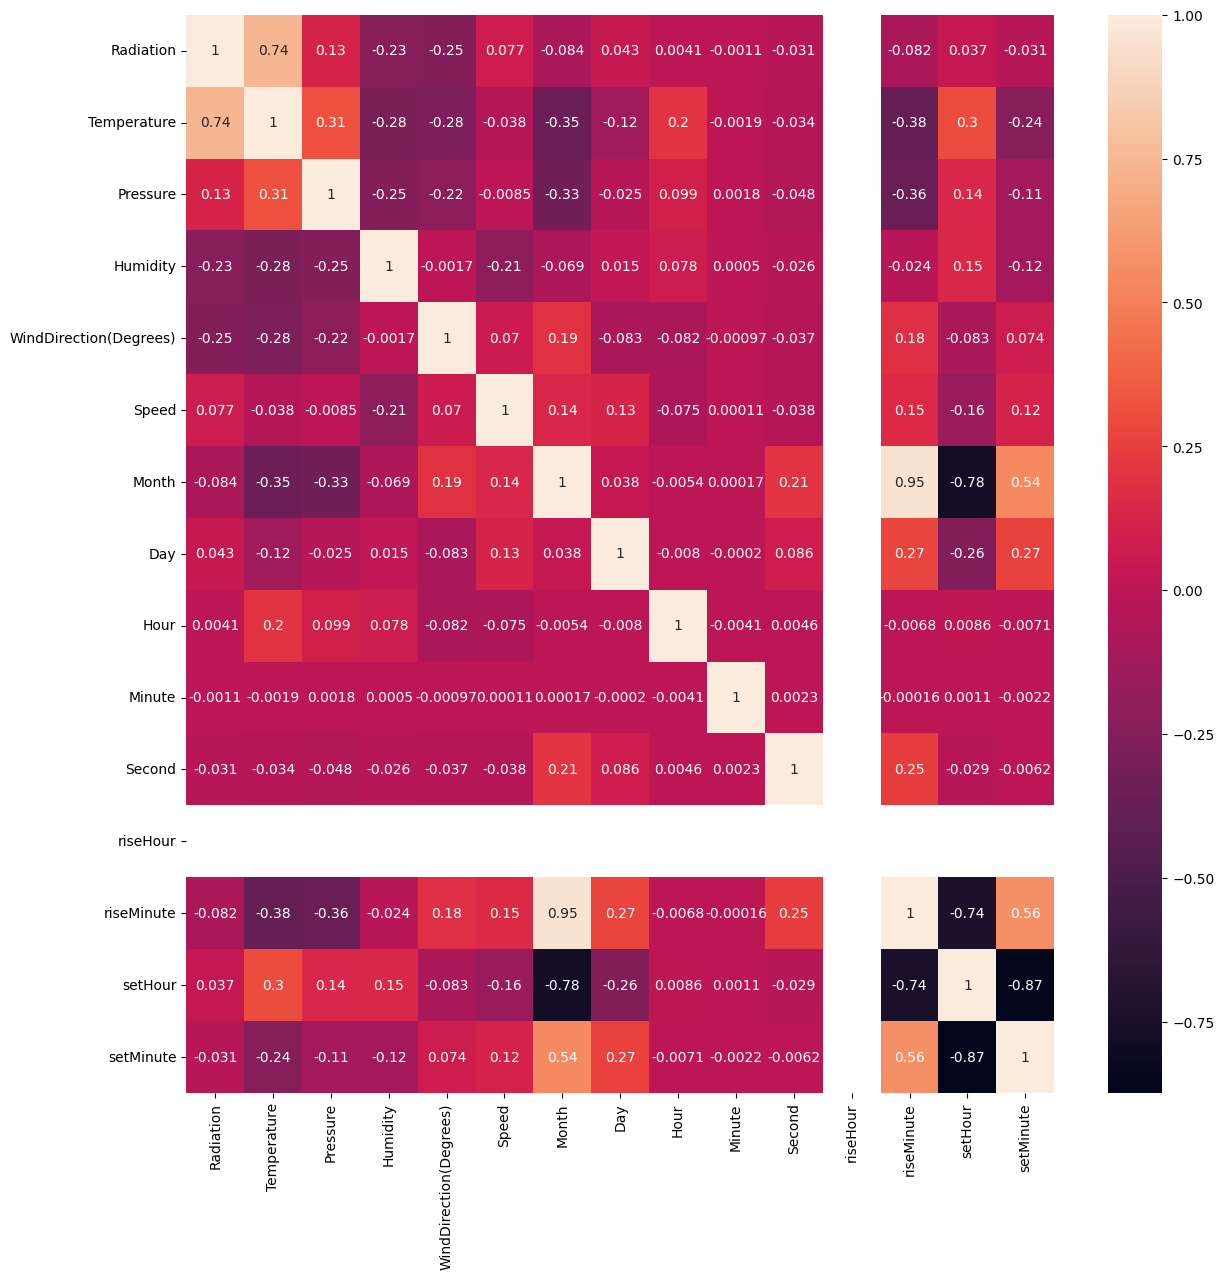

In [ ]:
# plot the correlation matrix using heatmap for clear understanding
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
# dropping columns which have the least correlation with the output column
df.drop(['Month','Minute','Second','riseMinute','setMinute'],axis=1,inplace=True)
df

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  \
0           1.21         48.0     30.46      59.0                  177.39   
1           1.21         48.0     30.46      58.0                  176.78   
2           1.23         48.0     30.46      57.0                  158.75   
3           1.21         48.0     30.46      60.0                  137.71   
4           1.17         48.0     30.46      62.0                  104.95   
...          ...          ...       ...       ...                     ...   
32681       1.22         44.0     30.43     102.0                  145.42   
32682       1.17         44.0     30.42     102.0                  117.78   
32683       1.20         44.0     30.42     102.0                  145.19   
32684       1.23         44.0     30.42     101.0                  164.19   
32685       1.20         44.0     30.43     101.0                   83.59   

       Speed   Day  Hour  riseHour  setHour  
0       5.62  29.0  23.0       6.0     18.0  
1       3.37  29.0  23.0       6.0     18.0  
2       3.37  29.0  23.0       6.0     18.0  
3       3.37  29.0  23.0       6.0     18.0  
4       5.62  29.0  23.0       6.0     18.0  
...      ...   ...   ...       ...      ...  
32681   6.75   1.0   0.0       6.0     17.0  
32682   6.75   1.0   0.0       6.0     17.0  
32683   9.00   1.0   0.0       6.0     17.0  
32684   7.87   1.0   0.0       6.0     17.0  
32685   3.37   1.0   0.0       6.0     17.0  

[32686 rows x 10 columns]

In [ ]:
x=df.drop(['Radiation'],axis=1)
y=df['Radiation']

**Splitting Training and Testing Data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=100)

In [ ]:
x_train

Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed   Day  \
19262         48.0     30.43      26.0               171.41000  12.37  19.0   
2550          50.0     30.42     100.0               148.07000   3.37  20.0   
16450         41.0     30.44      97.0               164.38000   5.62  29.0   
28677         55.0     30.31      78.0                15.85000   1.12  17.0   
25493         50.0     30.34      98.0                84.59000   5.62  28.0   
...            ...       ...       ...                     ...    ...   ...   
12119         68.0     30.48      38.0                 5.62000   6.75  15.0   
24423         48.0     30.49      53.0               171.14000   5.62   1.0   
14147         60.0     30.43      69.0               324.93375   3.37   8.0   
23320         47.0     30.46      37.0               133.15000  12.37   5.0   
5640          57.0     30.44      85.0                48.18000   9.00   7.0   

       Hour  riseHour  setHour  
19262   6.0       6.0     17.0  
2550   22.0       6.0     18.0  
16450   1.0       6.0     17.0  
28677  13.0       6.0     17.0  
25493  14.0       6.0     17.0  
...     ...       ...      ...  
12119  14.0       6.0     17.0  
24423   8.0       6.0     17.0  
14147   9.0       6.0     18.0  
23320   4.0       6.0     17.0  
5640   10.0       6.0     18.0  

[22880 rows x 9 columns]

In [ ]:
x_test

Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed   Day  \
26578         48.0     30.46      32.0               155.05000   9.00  24.0   
25967         41.0     30.46      97.0               130.08000   6.75  26.0   
19591         47.0     30.42      26.0               152.10000  10.12  18.0   
4948          61.0     30.47      82.0               324.93375   4.50  11.0   
31418         45.0     30.37      93.0               269.56000   6.75   5.0   
...            ...       ...       ...                     ...    ...   ...   
26527         45.0     30.46      34.0               126.78000  11.25  25.0   
7301          58.0     30.46      77.0                46.19000  14.62   1.0   
11107         48.0     30.42      69.0               167.43000   9.00  19.0   
14499         46.0     30.40      80.0               183.67000   7.87   7.0   
23727         54.0     30.42      33.0               143.80000   2.25   3.0   

       Hour  riseHour  setHour  
26578  20.0       6.0     17.0  
25967  23.0       6.0     17.0  
19591   3.0       6.0     17.0  
4948   13.0       6.0     18.0  
31418   9.0       6.0     17.0  
...     ...       ...      ...  
26527   0.0       6.0     17.0  
7301   11.0       6.0     18.0  
11107   3.0       6.0     17.0  
14499   3.0       6.0     18.0  
23727  18.0       6.0     17.0  

[9806 rows x 9 columns]

In [ ]:
y_train

19262     13.14
2550       1.23
16450      1.19
28677    241.83
25493    628.36
          ...  
12119    826.96
24423    370.75
14147    819.95
23320      1.20
5640     510.87
Name: Radiation, Length: 22880, dtype: float64

In [ ]:
y_test

26578      1.2200
25967      1.2200
19591      1.2100
4948     238.3300
31418    274.3100
           ...   
26527      1.2100
7301     883.7425
11107      1.2200
14499      1.2200
23727      1.2400
Name: Radiation, Length: 9806, dtype: float64

**Model creation**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error,r2_score
lr=LinearRegression()
dectree=DecisionTreeRegressor()
rand=RandomForestRegressor(max_depth=25, random_state=100)
support=SVR(kernel='rbf')
lst=[lr,dectree,rand,support]

In [ ]:
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("model is",i)
  print("percentage error is",mean_absolute_percentage_error(y_test,y_pred))
  print("r2score is",r2_score(y_test,y_pred))
  print()

model is LinearRegression()
percentage error is 41.24844017963475
r2score is 0.6336027714484769

model is DecisionTreeRegressor()
percentage error is 0.28238962325898576
r2score is 0.8874012632665216

model is RandomForestRegressor(max_depth=25, random_state=100)
percentage error is 0.2981616928968696
r2score is 0.9421296590053415

model is SVR()
percentage error is 17.63834819201125
r2score is 0.3548469650129832



**Hyperparameter tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
param_grid = {
    'n_estimators': [100, 200],
     'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4],
}

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

In [ ]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   random_state=42, verbose=2)

In [ ]:
print(rf_random.best_params_)

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}


In [ ]:
rf=RandomForestRegressor(n_estimators=200,max_depth=20,min_samples_split=2,min_samples_leaf=2)
rf.fit(x_train,y_train)
y_pred1=rf.predict(x_test)
y_pred1

array([1.21716684, 1.1980632 , 1.21781677, ..., 1.2130926 , 1.95833149,
       1.24554872])

In [ ]:
print("r2score is",r2_score(y_test,y_pred1))

r2score is 0.9430977111365707


In [ ]:
#prediction by using  random inputs
print(rf.predict([[46,30.40,31,152,8,24,20,6,17]]))

[1.22659164]


In [ ]:
import pickle
pickle.dump(rf, open('/content/random_model.pkl', 'wb'))

In [ ]:
! pip install streamlit -q

In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.45.231.243


In [ ]:
! streamlit run project.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.45.231.243:8501

Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) 